## Chronic Kidney Disease Dataset analysis

This notebook analyzes dataset obtained from patients diagnosed with Chronic Kidney Diease (CKD). The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, medication usage, symptoms, quality of life scores, environmental exposures, and health behaviors.

Source: https://www.kaggle.com/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis

Contributors: Adithya Hadidi, Kateryna Skoropad, Zarrin Rasizadeh, Anjali Deshpande

In [87]:
# Import standard libraries in this section
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


## Data exploration

In [88]:
df = pd.read_csv("../data/raw/Chronic_Kidney_Dsease_data.csv")

df

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,8.602873,5.239288,0,0,0,0,0,130,89,195.433613,7.309465,2.191402,23.207131,80.644448,2.926489,240.575604,137.142172,5.277706,9.867489,3.177054,14.331815,184.518899,133.107066,30.859157,320.668245,1,1,5.408175,0,0,0,6.973771,1.541242,6.972093,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,9.836919,6.401662,0,0,0,0,0,127,103,73.606489,4.357399,0.584633,27.145254,118.026779,3.496617,207.392143,136.744038,3.883738,9.411840,2.626317,11.397473,253.709988,131.987735,27.157762,334.818155,0,0,3.229984,1,0,1,0.465757,4.224176,0.465297,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,5.038194,8.440859,0,0,0,0,0,118,102,163.084321,8.235078,0.527432,29.733737,19.283249,3.549633,105.821102,143.887896,4.051049,8.705635,4.246865,16.727631,221.399305,183.307380,51.888571,162.784996,0,1,8.367022,0,0,0,4.537944,6.061171,2.281970,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,4.557577,5.527100,0,0,0,0,0,163,87,98.794331,

In [89]:
df.shape # number of rows and columns

(1659, 54)

In [90]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [91]:
# summary of the DataFrame (data types and number of non-null values in each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [92]:
# statistical summaries of the numerical columns
df.describe()
columns_to_drop = ["DoctorInCharge","PatientID"]
random_seed=1234
np.random.seed(random_seed)


## 1. Data Cleaning and Preprocessing

Drop *PatientID* and *DoctorInCharge* columns since they don't provide any information. Also cleaning the data makes it readily usable.


In [93]:
df = df.drop(columns_to_drop, axis = 1)
df.isnull().sum()
def clean_data(data, response_column=None, columns=None):
    
    if columns is None:
        columns = []
    if all(item in df.columns for item in columns):
     data.drop(columns, axis=1, inplace=True)
    predictor_columns=data.copy()
    predictor_columns.drop(response_column, axis=1, inplace=True)
    response_column=data[response_column]
    return predictor_columns,response_column,data



Let's Normalize the data, since we're using lasso regression as one of the models for regression, normalization is essential to give accurate predictions.


In [94]:
from sklearn import preprocessing
## Normalizing data, essential step in lasso regression as lasso regression is affected by the magnitude of measurements, ie. Higher numbers may disproportionally contribute to the prediction.
def normalize_data_min_max(raw_input_data):
    x = raw_input_data.values
    min_max_scaler = preprocessing.MinMaxScaler()
    return pd.DataFrame(min_max_scaler.fit_transform(x))



## 2. Univariate Analysis

(Source: https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/)

Display summary statistics for numerical and categorical columns

Display each feature with its count, mean, std deviation, min, max and 25%, 50%, 75% percentiles indicating the distribution of values.

In [95]:

# Display all columns 
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.width', None)  # None means unlimited width
df.describe(exclude=None)


,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,5.028544,6.942324,0.141049,0.301386,0.257384,0.105485,0.210368,134.392405,89.313442,132.529429,6.983682,2.753198,27.578147,66.829202,2.493736,149.881615,139.968984,4.505336,9.489156,3.505543,13.927304,224.251158,125.044597,60.746861,224.804603,0.295359,0.318264,5.011715,0.380952,0.202532,0.201929,5.016697,3.482121,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,2.865777,1.704159,0.348177,0.458998,0.437325,0.307270,0.407693,25.767794,17.354479,36.563035,1.734714,1.317168,12.808062,30.050836,1.449695,86.850287,2.905595,0.583963,0.574849,0.576634,2.338372,43.666586,42.645021,23.170415,100.321757,0.456341,0.465943,2.869813,0.485767,0.402007,0.401560,2.896311,1.986292,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,0.002407,4.001053,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,70.044768,4.000405,0.501799,5.000249,15.107850,0.000900,0.178427,135.006489,3.503408,8.500033,2.503727,10.004223,150.015707,50.074597,20.030993,50.267668,0.000000,0.000000,0.000469,0.000000,0.000000,0.000000,0.015194,0.005171,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,2.558443,5.487083,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,75.000000,100.504503,5.494988,1.583255,16.398275,41.149324,1.226335,76.784343,137.483563,3.993559,9.004488,2.984834,11.839478,186.440971,87.660348,41.252078,140.235507,0.000000,0.000000,2.619890,0.000000,0.000000,0.000000,2.464695,1.750661,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,4.989810,6.933255,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,89.000000,131.478423,6.988001,2.732006,28.077796,66.555207,2.505260,150.195312,139.863171,4.505416,9.470789,3.511712,13.909388,223.202106,126.537520,61.845056,226.466365,0.000000,0.000000,5.078511,0.000000,0.000000,0.000000,5.117247,3.519894,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,7.428290,8.346298,0.

For the numerical variables, visualizing distributions using histograms, box plots, or density plots to understand the spread and skewness of data.

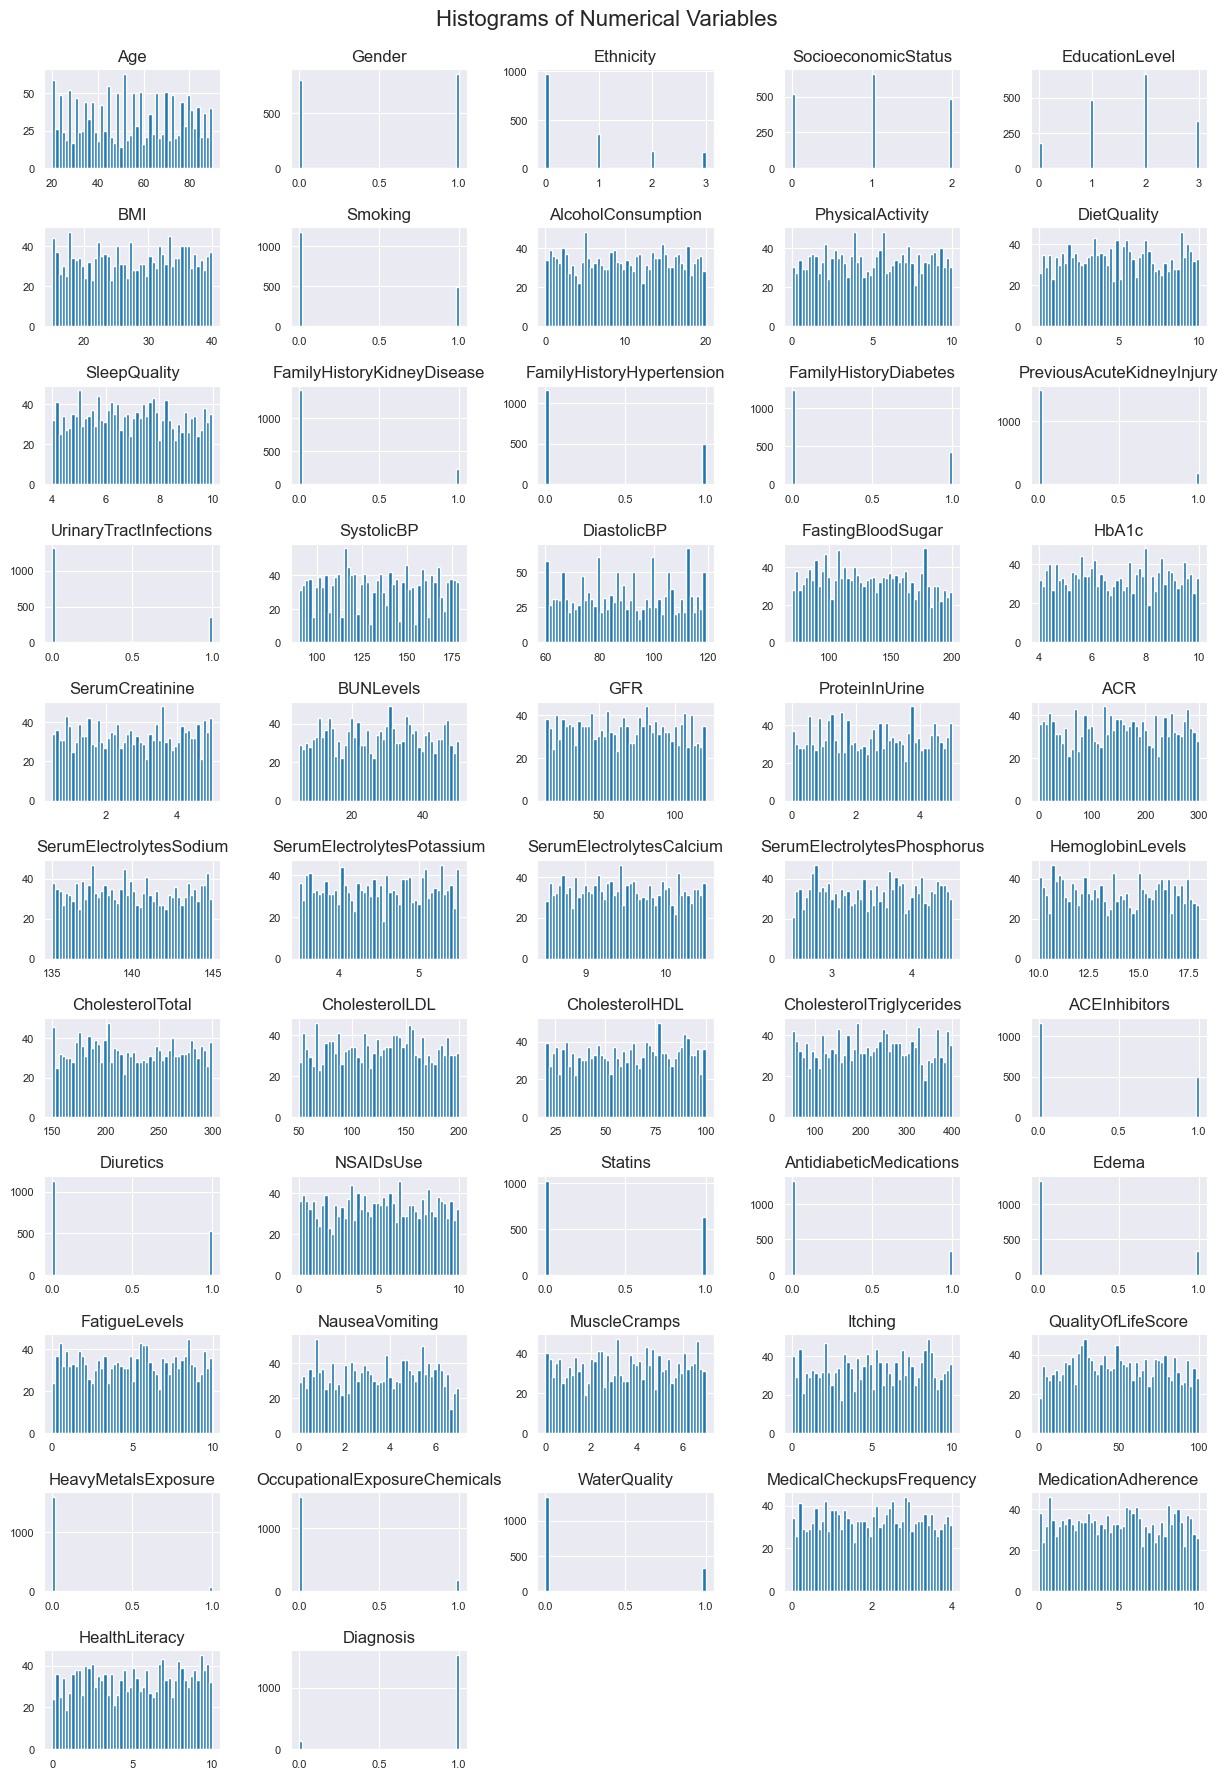

In [96]:
# Distribution of numerical variables in the df dataset
# Each histogram represents the frequency distribution of a numerical variable to gain insights into data distribution and skewness of data

df.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8, layout=(len(df.columns) // 5 + 1, 5))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.subplots_adjust(top=0.95, hspace=0.6, wspace=0.4)
plt.show()


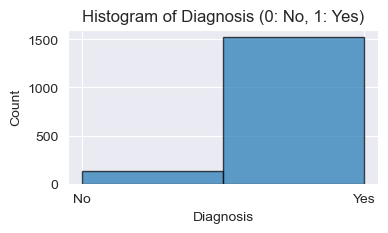

In [97]:
# Add code for histogram showing 'Diagnosis' as x-axis and count as y-axis
# Plotting the histogram for 'Diagnosis'
plt.figure(figsize=(4, 2))
plt.hist(df['Diagnosis'], bins=2, edgecolor='black', alpha=0.7, align='mid')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Histogram of Diagnosis (0: No, 1: Yes)')
plt.xticks([0, 1], ['No', 'Yes'])  # Replace x-axis ticks with 'No' and 'Yes'
plt.grid(True)
plt.show()

This histogram illustrates the distribution of diagnosis in the dataset, categorized as 'No' (0) and 'Yes' (1). The majority of cases fall under 'Yes', indicating a predominant occurance of positive

diagnoses compared to negative diagnoses, and therefore a skewed distribution towards positive diagnoses in the dataset.

The dataset contains large number of clinical measurements. For simplicity, lets just take 'GFR' and 'ProteinInUrine' to draw a scatter plot

In [98]:
# Add code for scatter plot

# Katreyna
### To be done

Scatterplot showing 'GFR' and 'SerumCreatinine'

In [99]:
# Add code for scatter plot

# Katreyna 
### To be done


For categorical variables, Frequency tables and bar charts to examine the distribution of categorical variables such as Gender, Ethnicity, Education Level, Smoking status, etc.

Distribution summary or frequency table for all the categorical variables

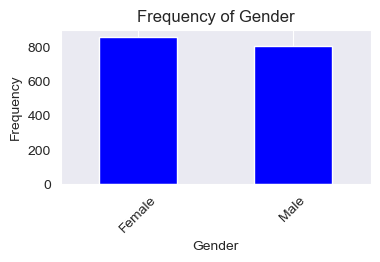

Distribution Summary of Gender:
Gender
Female    51.537071
Male      48.462929
Name: proportion, dtype: float64


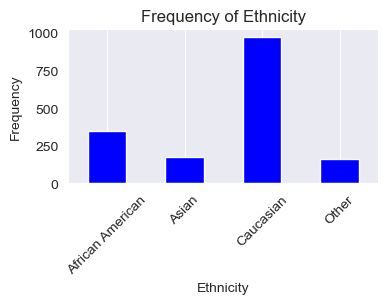

Distribution Summary of Ethnicity:
Ethnicity
African American    21.036769
Asian               10.488246
Caucasian           58.710066
Other                9.764919
Name: proportion, dtype: float64


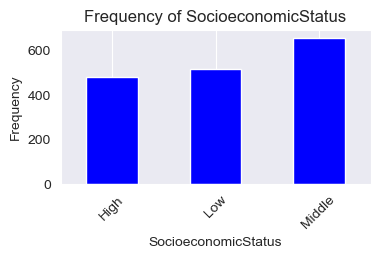

Distribution Summary of SocioeconomicStatus:
SocioeconomicStatus
High      29.053647
Low       31.283906
Middle    39.662447
Name: proportion, dtype: float64


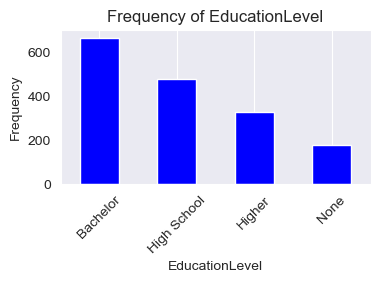

Distribution Summary of EducationLevel:
EducationLevel
Bachelor       40.265220
High School    28.933092
Higher         19.951778
None           10.849910
Name: proportion, dtype: float64


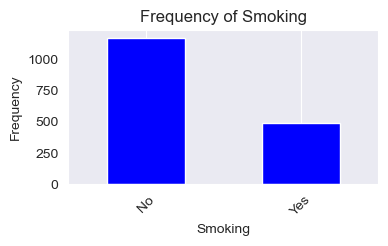

Distribution Summary of Smoking:
Smoking
No     70.705244
Yes    29.294756
Name: proportion, dtype: float64


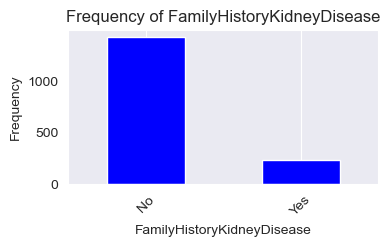

Distribution Summary of FamilyHistoryKidneyDisease:
FamilyHistoryKidneyDisease
No     85.895118
Yes    14.104882
Name: proportion, dtype: float64


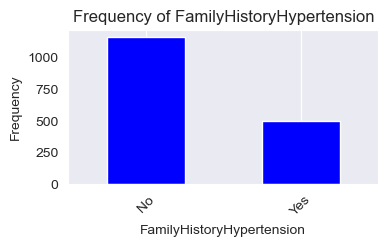

Distribution Summary of FamilyHistoryHypertension:
FamilyHistoryHypertension
No     69.861362
Yes    30.138638
Name: proportion, dtype: float64


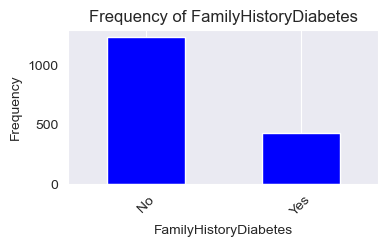

Distribution Summary of FamilyHistoryDiabetes:
FamilyHistoryDiabetes
No     74.261603
Yes    25.738397
Name: proportion, dtype: float64


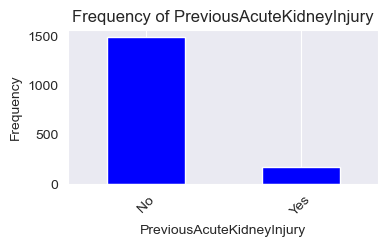

Distribution Summary of PreviousAcuteKidneyInjury:
PreviousAcuteKidneyInjury
No     89.451477
Yes    10.548523
Name: proportion, dtype: float64


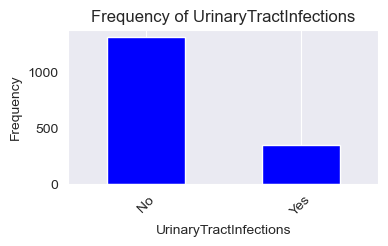

Distribution Summary of UrinaryTractInfections:
UrinaryTractInfections
No     78.963231
Yes    21.036769
Name: proportion, dtype: float64


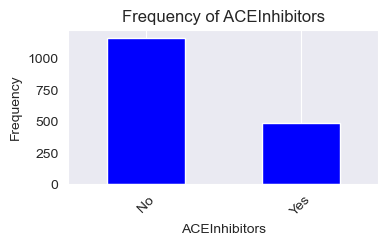

Distribution Summary of ACEInhibitors:
ACEInhibitors
No     70.464135
Yes    29.535865
Name: proportion, dtype: float64


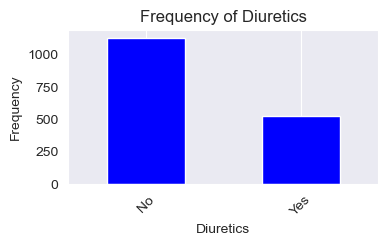

Distribution Summary of Diuretics:
Diuretics
No     68.173599
Yes    31.826401
Name: proportion, dtype: float64


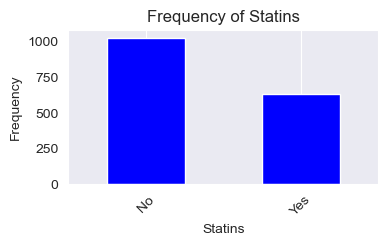

Distribution Summary of Statins:
Statins
No     61.904762
Yes    38.095238
Name: proportion, dtype: float64


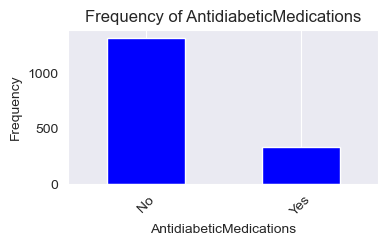

Distribution Summary of AntidiabeticMedications:
AntidiabeticMedications
No     79.746835
Yes    20.253165
Name: proportion, dtype: float64


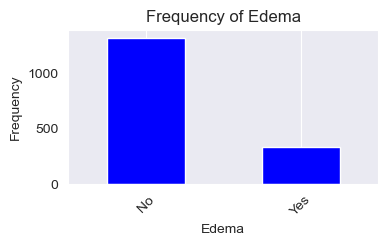

Distribution Summary of Edema:
Edema
No     79.807113
Yes    20.192887
Name: proportion, dtype: float64


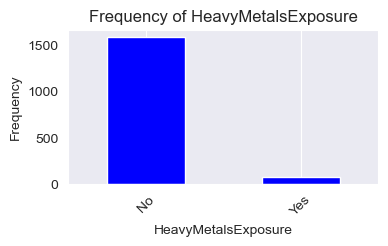

Distribution Summary of HeavyMetalsExposure:
HeavyMetalsExposure
No     95.599759
Yes     4.400241
Name: proportion, dtype: float64


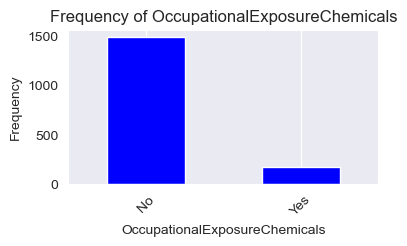

Distribution Summary of OccupationalExposureChemicals:
OccupationalExposureChemicals
No     89.692586
Yes    10.307414
Name: proportion, dtype: float64


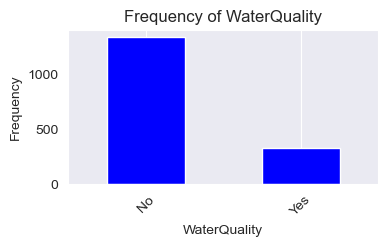

Distribution Summary of WaterQuality:
WaterQuality
No     80.289331
Yes    19.710669
Name: proportion, dtype: float64


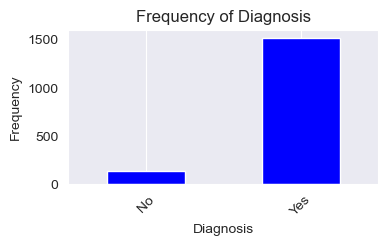

Distribution Summary of Diagnosis:
Diagnosis
No      8.137432
Yes    91.862568
Name: proportion, dtype: float64


In [100]:
# Add code for frequency tables/bar charts for categorical

# Define mappings for each categorical variable

category_mappings = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Ethnicity': {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'},
    'SocioeconomicStatus': {0: 'Low', 1: 'Middle', 2: 'High'},
    'EducationLevel':{0: 'None', 1: 'High School', 2: 'Bachelor', 3: 'Higher'},
    'Smoking': {0: 'No', 1: 'Yes'},
    'FamilyHistoryKidneyDisease':{0: 'No', 1: 'Yes'},
    'FamilyHistoryHypertension': {0: 'No', 1: 'Yes'},
    'FamilyHistoryDiabetes': {0: 'No', 1: 'Yes'},
    'PreviousAcuteKidneyInjury': {0: 'No', 1: 'Yes'},
    'UrinaryTractInfections': {0: 'No', 1: 'Yes'},
    'ACEInhibitors': {0: 'No', 1:'Yes'},
    'Diuretics': {0: 'No', 1:'Yes'},
    'Statins': {0: 'No', 1:'Yes'},
    'AntidiabeticMedications': {0: 'No', 1:'Yes'},
    'Edema': {0: 'No', 1:'Yes'},
    'HeavyMetalsExposure': {0: 'No', 1:'Yes'},
    'OccupationalExposureChemicals': {0: 'No', 1:'Yes'},
    'WaterQuality': {0: 'No', 1:'Yes'},
    'Diagnosis': {0: 'No', 1:'Yes'}
    }

# List of categorical features

categorical_features = [
    # demographic
    'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
    # Lifestyle
    'Smoking', 
    # Medical History
    'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 
    'UrinaryTractInfections',
    # Medications
    'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications',
    # Symptoms and Quality of Life
    'Edema', 
    # Environmental and Occupational Exposures
    'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality',
    # Diagnosis
    'Diagnosis'
    ]

# Plot frequency tables and bar charts with updated labels
for feature in categorical_features:
    # Apply mappings to replace numeric codes with labels
    df_mapped = df.replace({feature: category_mappings.get(feature, {})})

    # Create a frequency table
    freq_table = df_mapped[feature].value_counts().sort_index()

    # Create distribution summary
    prop_table = (df_mapped[feature].value_counts(normalize=True) * 100).sort_index()

    # Plotting
    plt.figure(figsize=(4, 2))
    freq_table.plot(kind='bar', color='blue')
    plt.title(f'Frequency of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

    # Display distribution summary
    print(f'Distribution Summary of {feature}:')
    print(prop_table)
    print()


The distribution summary of gender indicates that females constitute about 51.54% and males 48.46% of the dataset, and suggests a balanced representation of gender within the analyzed population.

Majority of individuals in the dataset are Caucasian (58.71%), followed by African American (21.04%), Asian (10.49%), and Other ethnicities (9.76%).

Socioeconomic status is evenly distributed among high (29.05%), low (31.28%), and middle (39.66%) categories in the dataset.

Education levels vary, with a significant proportion holding bachelor's degrees (40.27%), followed by high school (28.93%), higher education (19.95%), and no formal education (10.85%).

The majority of individuals in the dataset do not smoke (70.71%), while 29.29% are smokers.

A large majority of individuals (85.90%) have no family history of kidney disease, while 14.10% have a positive family history.

Most individuals (69.86%) do not have a family history of hypertension, whereas 30.14% do.

A significant majority of individuals (74.26%) do not have a family history of diabetes, while 25.74% do.

The majority of individuals (89.45%) have no history of previous acute kidney injury, while 10.55% have experienced it.

Most individuals (78.96%) have not had urinary tract infections, while 21.04% have.

A significant proportion of individuals (70.46%) are not using ACE inhibitors, while 29.54% are.

The majority of individuals (68.17%) are not using diuretics, while 31.83% are.

A significant proportion of individuals (61.90%) are not using statins, while 38.10% are.

Most individuals (79.75%) are not using antidiabetic medications, while 20.25% are.

The majority of individuals (79.81%) do not exhibit edema, while 20.19% do.

A large majority of individuals (95.60%) have not been exposed to heavy metals, while 4.40% have.

Most individuals (89.69%) have not been exposed to chemicals occupationally, while 10.31% have.

The majority of individuals (80.29%) do not have concerns about water quality, while 19.71% do.

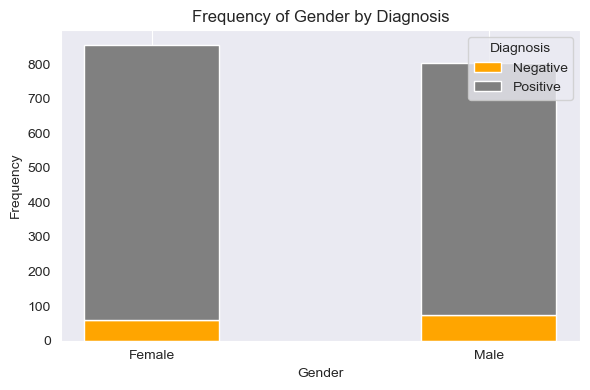

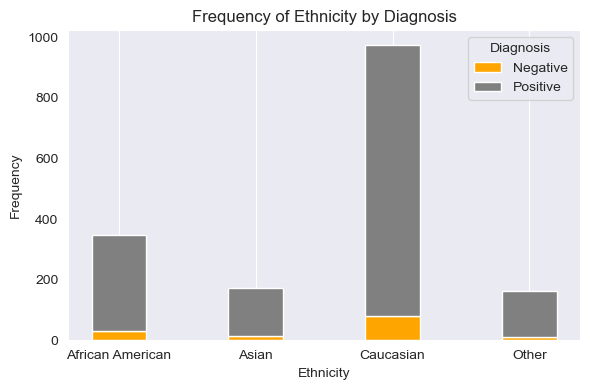

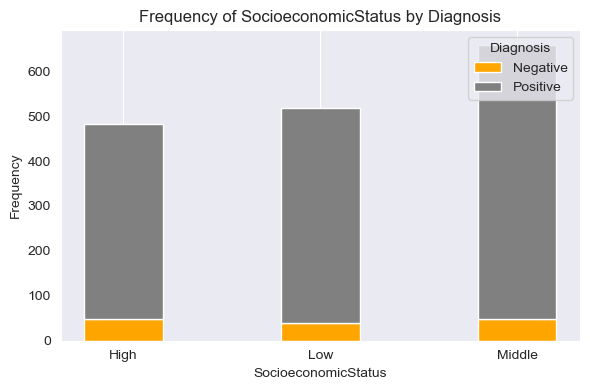

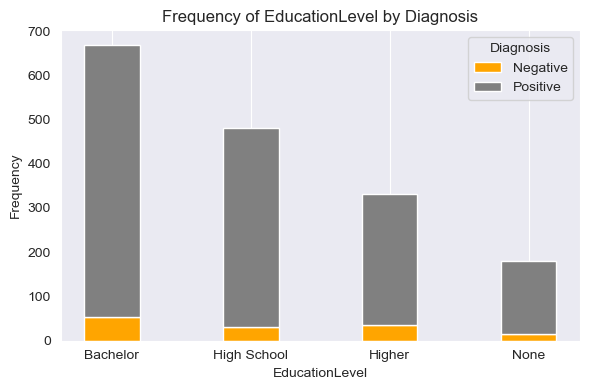

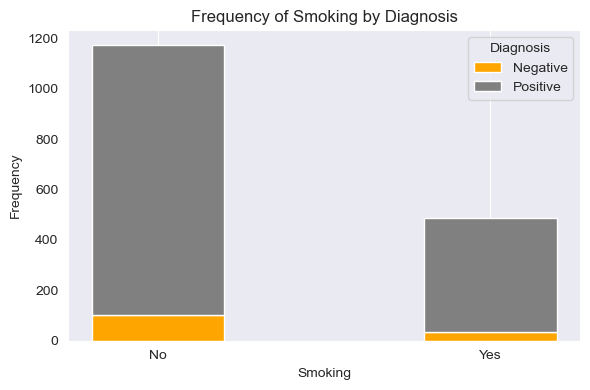

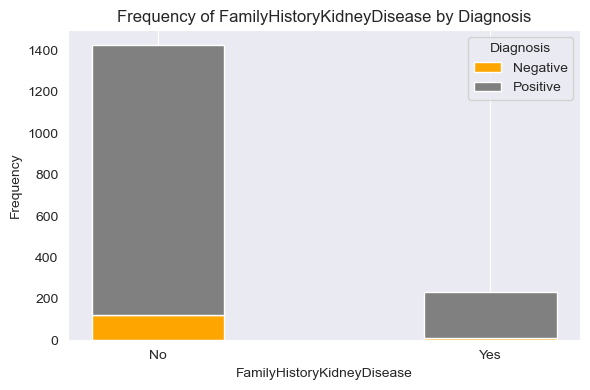

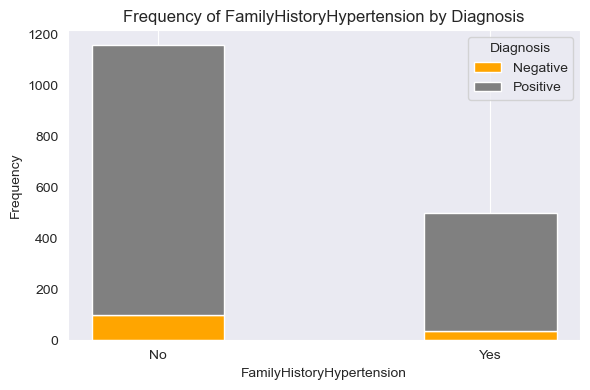

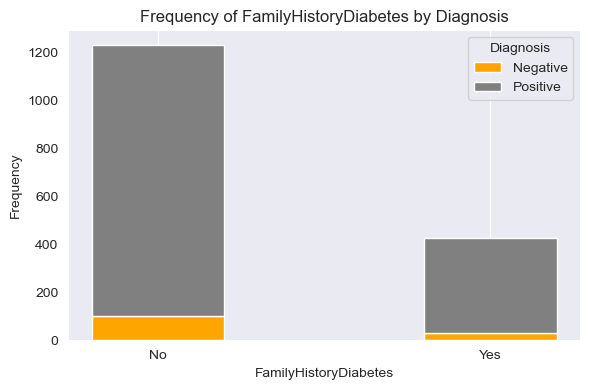

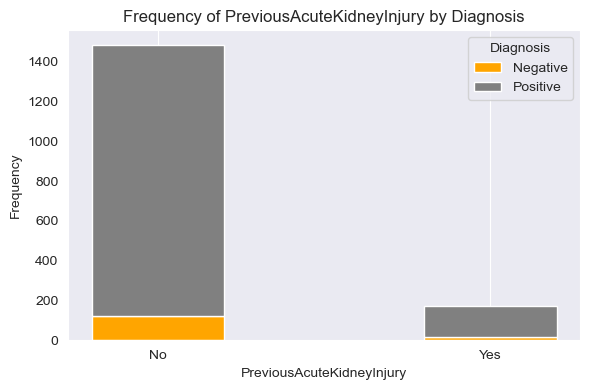

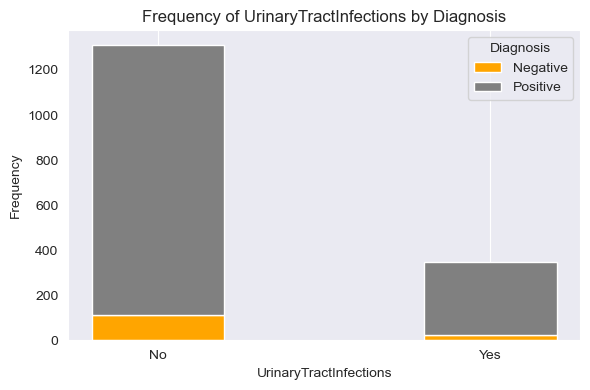

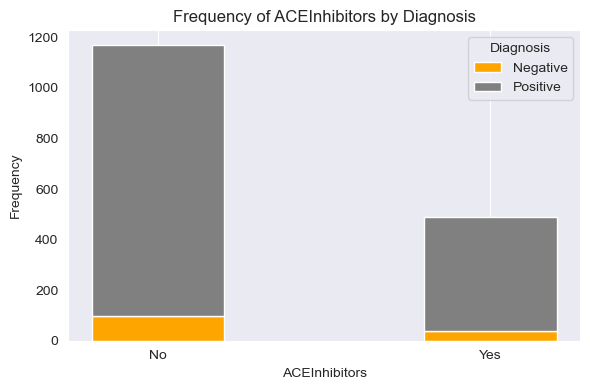

KeyboardInterrupt: 

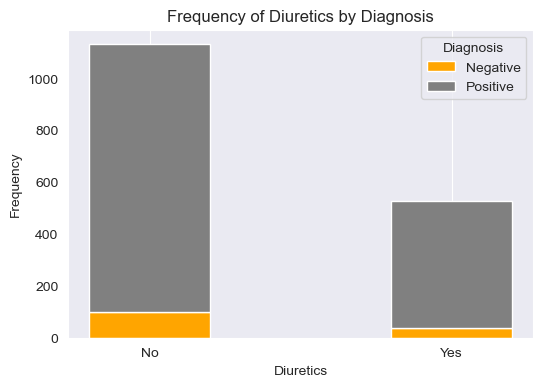

In [101]:
# Distribution of categorical variables by Diagnosis
# List of categorical features
categorical_features = [
    'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
    'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections',
    'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications',
    'Edema', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality'
]

# Plot frequency tables and bar charts with updated labels
for feature in categorical_features:
    # Apply mappings to replace numeric codes with labels
    df_mapped = df.replace({feature: category_mappings.get(feature, {})})

    # Create a frequency table
    freq_table = df_mapped[feature].value_counts().sort_index()

    # Initialize plot with smaller figure size
    plt.figure(figsize=(6, 4))

    # Loop through each category
    for i, (index, value) in enumerate(freq_table.items()):
        # Calculate counts of positive and negative diagnoses
        positive_count = df_mapped[(df_mapped[feature] == index) & (df_mapped['Diagnosis'] == 1)].shape[0]
        negative_count = df_mapped[(df_mapped[feature] == index) & (df_mapped['Diagnosis'] == 0)].shape[0]

        # Plotting stacked bars with thinner width
        plt.bar(index, negative_count, color='orange', width=0.4, label='Negative' if i == 0 else None)
        plt.bar(index, positive_count, bottom=negative_count, color='grey', width=0.4, label='Positive' if i == 0 else None)

    # Set x-axis ticks and labels
    plt.xticks(freq_table.index, freq_table.index.map(str))
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {feature} by Diagnosis')
    plt.legend(title='Diagnosis', loc='upper right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

Stacked Bar Charts above visulize the distribution of various categorical variables in relation to the diagnosis outcome where Orange bars represent the frequency of negative diagnoses and Grey bars

represent the frequency of positive diagnoses.

## 3. Bivariate Analysis

### 1. Correlation Analysis

1. Pearson correlation matrix

Compute Pearson correlation coefficients between pairs of numerical variables (All variables or a set of variables: e.g., Serum Creatinine vs. GFR, Blood Pressure vs. GFR) to understand relationships.


In [ ]:

# Standardize the columns (normalize) before finding correlation
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Add correlation matrix
correlation_matrix = df_standardized.corr()
print("Pearson Correlation Matrix:")
display(correlation_matrix)



2. Top 15 correlations between variables.

This could give us information about what variables to use for building Linear Regression model (for continuous variables) and Linear Regression model (for categorical variable).

In [ ]:
# Filter for top absolute correlations
# Example: Top 15 correlations by absolute value
num_top_correlations = 30

# Unstack the correlation matrix to create a Series
unstacked_correlation = correlation_matrix.unstack()

# Filter out diagonal elements where row index equals column index. Excluding self co-relation (For eg: Age with Age)
filtered_correlation = unstacked_correlation[unstacked_correlation.index.get_level_values(0) != unstacked_correlation.index.get_level_values(1)]


# Display the top sorted autocorrelations
top_correlations = filtered_correlation.sort_values(ascending=False, key=lambda x: np.abs(x)) .head(num_top_correlations)

# Drop duplicates based on sorted columns
# Reset index to convert MultiIndex to columns for easier manipulation
correlation_series = top_correlations.reset_index()
# Sort Variable1 and Variable2 to ensure consistent order
correlation_series[['level_0', 'level_1']] = pd.DataFrame(np.sort(correlation_series[['level_0', 'level_1']], axis=1))
unique_correlations = pd.DataFrame(correlation_series.drop_duplicates(subset=['level_0', 'level_1']))
unique_correlations.reset_index(inplace=True)

display(unique_correlations)


**Observations**

Positive correlation (e.g., 0.201125 between Diagnosis and SerumCreatinine): As SerumCreatinine increases, the Diagnosis tends to increase as well.

Negative correlation (e.g., -0.175988 between Diagnosis and GFR): As GFR increases, the Diagnosis tends to decrease.

The magnitude of the correlation coefficient (correlation) indicates how strong the relationship is between the two features. Values closer to -1 or 1 indicate a stronger correlation, while values closer to 0 indicate a weaker correlation.


3. Visualize correlations using heatmaps to identify strong correlations (>0.5 or <-0.5) among variables.

Intrepret Correlation coefficient from the heatmap to indicate positive/negative/0/strength of relationships. For eg: test association of Edema and CKD diagnosis

Visualizing a heatmap for correlation between predictor . This helps us understand the relationship between predictor variable and their significance to the response variable ( the column 'Diagnosis', in our case ).


In [ ]:
predictor_data,response_data,raw_data=clean_data(df,"Diagnosis",columns_to_drop)
corr_matrix = raw_data.corr()
plt.figure(figsize=(30, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of predicting factors and the response variable')
plt.show()

### 2. Relationships with CKD

Compare distributions of numerical variables (e.g., Age, BMI, clinical measurements) between CKD and non-CKD groups using box plots.
For example: Boxplot to show distribution of SerumCreatinine levels between patients diagnosed with CKD and those without CKD.
Box-plot make it easy to identify outliers and will help in understanding quality of data


In [ ]:
# Add code for box plot


# Katreyna
### To be done

Let's also perform a T-Test to compare the means of our predictors ( features) with a positive CKD. The null and alternative hypotheses are as follows:

Null hypotheses : There is no difference between the means of each predictor column and the response variable (ie. a positive CKD diagnosis ).
Alternative hypothesis : The means of the predictor and response variables are NOT equal.

In [ ]:
from scipy.stats import ttest_ind


In [ ]:
# add code for t-test
def perform_ttest(x, y):
    t_test_results={}
    for column in x:
        t_stat, p_value = ttest_ind(x[column], y, equal_var=False)  # assuming unequal variance
        t_test_results[column] = {'t_stat': t_stat, 'p_value': p_value}
    return t_test_results
# Convert results to a DataFrame for better readability

t_test_df = pd.DataFrame(perform_ttest(predictor_data,response_data)).T
print(t_test_df)


## Models

Lets find what factors can predict the likelihood of a patient having Chronic Kidney Disease (CKD)?

## Logistic Regression

Lets use logistic regression to model the probability of CKD based on predictor variables. 
Variables: Age, Gender, Ethnicity, Clinical measurements, Lifestyle factors, Medical history as predictors (all variables); CKD diagnosis (Diagnosis) as the binary response variable.



In [ ]:
# add code here

# Kateryna
### To be done

Plots to show the model:

1. ROC curve: Plot sensitivity vs. 1-specificity to evaluate model performance.

2. Variable coefficient plot: Display coefficients of predictors to understand their impact on CKD likelihood.

In [ ]:
# Add code here

# Anjali
### To be done

## Logistic regression analysis to determine odds ratios

Perform logistic regression analysis to determine odds ratios and assess the significance of variables such as hypertension, diabetes, and medication use in relation to Chronic Kidney Disease (CKD).
Choosing the following independent variables (predictors) to include in the logistic regression model:

1. Hypertension (FamilyHistoryHypertension)
2. Diabetes (FamilyHistoryDiabetes or AntidiabeticMedications)
3. Medication use (ACEInhibitors, Diuretics, Statins, NSAIDsUse, etc.)

In [ ]:
# Add code here

# Anjali
### To be done

## KNN Model

Use k-Nearest Neighbors to predict the outcome of Chronic Kidney Disease based on the dataset. Use all predictor variables and/or a set of variables to train and test the model.  Use classification metrics such as accuracy, precision, recall, and F1-score to evaluate how well the k-NN model predicts CKD compared to actual outcomes in the test set. 

In [ ]:

# X contains predictor variables including NSAID uses and y contains CKD diagnosis
#predictors = df[['ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications']]
# All variables except 'Diagnosis' is predictor
predictors = df.iloc[:, :-1] # all predictors

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# setting the seed
np.random.seed(45)

# Create a random vector of True and False values
split = np.random.choice([True, False], size=len(predictors_standardized), replace=True, p=[0.75, 0.25])


training_X = predictors_standardized[split] # Define the training set for X (predictors)
training_y = df.loc[split, 'Diagnosis']     # Define the training set for Y (response)


testing_X = predictors_standardized[~split] # Define the testing set for X (predictors)
testing_y = df.loc[~split, 'Diagnosis']     # Define the testing set for Y (response)


training_X, testing_X = [np.asarray(X) for X in [training_X, testing_X]]

# Build KNN model with 5 neigbbours
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(training_X, training_y)
knn_pred_y = knn.predict(testing_X)

# Print the confusion matrix
cm = confusion_matrix(knn_pred_y, testing_y)

accuracy = knn.score(testing_X, testing_y)
print("Accuracy of KNN model:", accuracy)

print(classification_report(testing_y, knn_pred_y))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Observations**

Precision (ratio of correctly predicted positive observations (CKD) to the total predicted positive observations.)

1. Precision for class 0 (no CKD): 0.00. This indicates that when the model predicted no CKD, it was almost always incorrect (since TN is 0).
2. Precision for class 1 (CKD): 0.92 When the model predicted CKD, it was correct 92% of the time.

Recall (ratio of correctly predicted positive observations (CKD) to all observations in the actual class (true positives + false negatives)).

1. Recall for class 0: 0.00  None of the actual instances of no CKD were correctly identified by the model (since TN is 0).
2. Recall for class 1: 0.99 The model correctly identified CKD in 99% of the cases where CKD actually occurred.


F1-score (harmonic mean of precision and recall and a single metric that balances both measures)

1. F1-score for class 0: 0.00
2. F1-score for class 1: 0.96

Accuracy is found to be 0.918 (or 91.8%)  The model correctly predicted 91.8% of the cases in the dataset.

The confusion matrix and precision-recall metrics show a significant class imbalance. There are very few instances of no CKD (class 0), and the model struggles to correctly identify these instances. This imbalance is visible from the low values of precision and recall for class 0.

While this KNN model (n=5) shows strong performance in predicting CKD (class 1), there are significant challenges in correctly identifying instances of no CKD (class 0). Addressing these challenges could involve strategies such as data balancing techniques, refining feature selection, or exploring other classification algorithms that might better handle class imbalance.

## Linear Regression



In [ ]:
# Linear Regression Model
# Selecting independent variables
independent_vars = ['BUNLevels', 'SerumCreatinine', 'ProteinInUrine', 'HbA1c']

# Add constant to the independent variables
X = sm.add_constant(df[independent_vars])

# Dependent variable
y = df['GFR']

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print summary statistics
print(results.summary())



The linear regression model using BUNLevels, SerumCreatinine, ProteinInUrine, and HbA1c as predictors does not provide a good fit for predicting GFR in this dataset. The low R-squared (0.003),

non-significant F-statistic with a p-value of 0.309, which is greater than 0.05, and non-significant coefficients (p-values> 0.05) indicate that these variables do not explain the variability in GFR

adequately. Therefore, this model may not be useful for predicting GFR based on the included predictors in this dataset.

## Lasso Regression

Lasso regression, or Least Absolute Shrinkage and Selection Operator, is a type of linear regression that applies L1 regularization, effectively shrinking some coefficients to zero. This makes it particularly useful for feature selection, simplifying models by excluding irrelevant predictors, and enhancing interpretability. It is especially beneficial in high-dimensional datasets where the number of predictors is large relative to the number of observations, helping to identify the most significant predictors and reduce model complexity.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
#implement lasso regression with MSE (Mean squared error) as the predictor variables are correlated.
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_data,Y_data,cleaned_raw_data=predictor_data,response_data,raw_data
X_scaled = normalize_data_min_max(X_data)
X_train,X_test,y_train,y_test=train_test_split(X_scaled, Y_data, test_size=0.2, random_state=random_seed)
lasso = Lasso(alpha=0.3)
result=lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred)
coefficients = lasso.coef_
intercept = lasso.intercept_
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print ("mean Squared error : " + lasso_mse.__str__())
print("mean Absolute error : "+mae.__str__())
print("R-squared-score:" + r2.__str__())



Once we've visualized the correlation between our predictor variables, let's visualize the results and accuracy of our prediction on a graph. based on the heatmap, some predictor variables are loosely correlated, using regression methods that accounts for this correlation can be helpful.


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Predicted vs Actual Values')
plt.legend(['Actual Values', 'Predicted Values'])
plt.show()

Interpretation:
Mean Squared Error (MSE)

    MSE: 0.08232249356167126
        Interpretation: The MSE represents the average of the squared differences between the actual and predicted values. An MSE of 0.082 suggests that the predictions are, on average, off by the square root of this value. While this value indicates the magnitude of error.

Mean Absolute Error (MAE)

    MAE: 0.15518744155219216
        Interpretation: The MAE is the average of the absolute differences between the actual and predicted values. An MAE of 0.155 indicates that, on average, the model's predictions are off by 0.155 units.

R-squared Score (R²)

    R-squared Score (R²): -0.0015358201260102788
        Interpretation: The R² score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² value of -0.0015 is unusual and indicates that the model does not fit the data well. A negative R² value suggests that the model is performing worse than a simple horizontal line (mean of the dependent variable). This can happen when the chosen model is inappropriate for the data or if there is too much noise in the data.

